# 新型冠状病毒数据分析演示

新型冠状病毒（2019-nCov) 的疫情牵动着全世界人民的心，而理性地对待离不开数据和分析。为了让人民大众及时了解情况，很多网站都公布疫情的实时信息。比方说[丁香园疫情实时动态](https://ncov.dxy.cn/ncovh5/view/pneumonia)， [腾讯疫情实时追踪](https://news.qq.com/zt2020/page/feiyan.htm)， [约翰霍普金斯实时新冠地图](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) 等等。这些网站快速地为公众提供了信息，增加了透明度。但是如果读者希望对疫情有进一步的了解，这些网站就不够用了。比方说，如果你想得到过去十天湖北省确诊人数，那就只能从趋势图上作个估计了。再比方说，如果你想对比一下湖南、广东、浙江三省在过去十天的新增确诊人数，那么单凭网页数据也无能为力了。

为了取得可以供研究使用的数据，[DXY-2019-nCoV-Data](https://github.com/BlankerL/DXY-2019-nCoV-Data) 项目利用网络爬虫不断从网上抓取数据，更新并存成 CSV 格式。然而，这个 CSV 文件包含的是不同时刻网页上的信息片段，有的时候只有这几个城市，有的时候只有那几个城市，数据并不规整。

为了进一步方便用户进行研究，本项目[nCov2019_analysis](https://github.com/jianxu305/nCov2019_analysis) 提供了一些基本工具，把实时数据规整为每日数据，方便用户按时间、省份、城市等方法检索。同时，本项目还提供了基本的时间序列和横向分析作图函数，方便用户取得基本信息。

以下是基本使用方法演示：

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import utils   # some convenient functions

%load_ext autoreload
%autoreload 2

## 1. 获取原始 CSV 数据

In [2]:
data = utils.load_chinese_data()

Last update:  2020-02-14 23:18:15.495000
Data date range:  2020-01-24 to 2020-02-14
Number of rows in raw data:  39285


In [3]:
data.head(3)  # 查看数据形式

,province_name,city_name,province_confirmed,province_suspected,province_cured,province_dead,city_confirmed,city_suspected,city_cured,city_dead,update_time,update_date
0,广西壮族自治区,南宁,226,0,36,2,47,0,11,0,2020-02-14 23:18:15.495,2020-02-14
1,广西壮族自治区,北海,226,0,36,2,40,0,4,1,2020-02-14 23:18:15.495,2020-02-14
2,广西壮族自治区,桂林,226,0,36,2,31,0,5,0,2020-02-14 23:18:15.495,2020-02-14


## 2. 数据预处理
### 2.1 把实时数据整合成每日数据，以更新日期 *update_date* 为索引
*aggDaily()* 函数内部作了一部分数据除错处理，加入了每日新增案例，以及英文（拼音）地名以方便检索

In [4]:
daily_frm = utils.aggDaily(data)

In [5]:
daily_frm.tail(3)

,update_date,province_name,province_name_en,city_name,city_name_en,cum_confirmed,cum_cured,cum_dead,new_confirmed,new_cured,new_dead,update_time
77,2020-02-14,黑龙江省,Helongjiang,鹤岗,Hegang,5,2,0,0.0,1.0,0.0,2020-02-14 21:20:51.303
74,2020-02-14,黑龙江省,Helongjiang,黑河,Heihe,13,0,0,3.0,0.0,0.0,2020-02-14 21:20:51.303
71,2020-02-14,黑龙江省,Helongjiang,齐齐哈尔,Qiqihaer,36,8,1,3.0,4.0,0.0,2020-02-14 21:20:51.303


## 3. 数据查看

### 3.1 提取部分信息

#### 用 province_name 检索省级数据

In [6]:
daily_frm[daily_frm['province_name'] == '广东省'].head()

,update_date,province_name,province_name_en,city_name,city_name_en,cum_confirmed,cum_cured,cum_dead,new_confirmed,new_cured,new_dead,update_time
38306,2020-01-24,广东省,Guangdong,中山,Zhongshan,2,0,0,NaN,NaN,NaN,2020-01-24 23:35:03.158
38300,2020-01-24,广东省,Guangdong,佛山,Foshan,7,0,0,NaN,NaN,NaN,2020-01-24 23:35:03.158
38301,2020-01-24,广东省,Guangdong,广州,Guangzhou,7,0,0,NaN,NaN,NaN,2020-01-24 23:35:03.158
38302,2020-01-24,广东省,Guangdong,惠州,Huizhou,5,0,0,NaN,NaN,NaN,2020-01-24 23:35:03.158
38298,2020-01-24,广东省,Guangdong,深圳,Shenzhen,15,2,0,NaN,NaN,NaN,2020-01-24 23:35:03.158


#### 用 city_name 检索市级数据

In [7]:
daily_frm[daily_frm['city_name'] == '武汉'].head()

,update_date,province_name,province_name_en,city_name,city_name_en,cum_confirmed,cum_cured,cum_dead,new_confirmed,new_cured,new_dead,update_time
38497,2020-01-24,湖北省,Hubei,武汉,Wuhan,495,31,23,NaN,NaN,NaN,2020-01-24 17:30:09.978
37322,2020-01-25,湖北省,Hubei,武汉,Wuhan,572,32,38,77.0,1.0,15.0,2020-01-25 23:55:35.775
36673,2020-01-26,湖北省,Hubei,武汉,Wuhan,618,40,45,46.0,8.0,7.0,2020-01-26 13:50:35.848
35494,2020-01-27,湖北省,Hubei,武汉,Wuhan,698,42,63,80.0,2.0,18.0,2020-01-27 16:42:57.343
34690,2020-01-28,湖北省,Hubei,武汉,Wuhan,1590,47,85,892.0,5.0,22.0,2020-01-28 16:36:17.441


#### 也可以用 province_name_en, city_name_en 进行英文（拼音）检索
（请注意，因为可能存在不同城市的汉字对应相同的拼音，所以检索城市时请尽量使用汉字。如果使用拼音检索，请务必保证其对应汉字城市的唯一性）

In [8]:
daily_frm[daily_frm['city_name_en'] == 'Guangzhou'].head()

,update_date,province_name,province_name_en,city_name,city_name_en,cum_confirmed,cum_cured,cum_dead,new_confirmed,new_cured,new_dead,update_time
38301,2020-01-24,广东省,Guangdong,广州,Guangzhou,7,0,0,NaN,NaN,NaN,2020-01-24 23:35:03.158
37963,2020-01-25,广东省,Guangdong,广州,Guangzhou,14,0,0,7.0,0.0,0.0,2020-01-25 10:56:23.314
36554,2020-01-26,广东省,Guangdong,广州,Guangzhou,17,0,0,3.0,0.0,0.0,2020-01-26 18:26:35.233
35380,2020-01-27,广东省,Guangdong,广州,Guangzhou,41,0,0,24.0,0.0,0.0,2020-01-27 21:01:37.693
34597,2020-01-28,广东省,Guangdong,广州,Guangzhou,51,0,0,10.0,0.0,0.0,2020-01-28 18:44:36.890


#### 用 updateDate 检索单日数据

In [9]:
daily_frm[daily_frm['update_date'] == pd.to_datetime('2020-01-27')].head()

,update_date,province_name,province_name_en,city_name,city_name_en,cum_confirmed,cum_cured,cum_dead,new_confirmed,new_cured,new_dead,update_time
35531,2020-01-27,上海市,Shanghai,嘉定区,Jiadingqu,1,0,0,NaN,NaN,NaN,2020-01-27 15:56:40.534
35521,2020-01-27,上海市,Shanghai,外地来沪人员,Non_Residence,23,3,0,NaN,NaN,NaN,2020-01-27 15:56:40.534
35532,2020-01-27,上海市,Shanghai,奉贤区,Fengxian,1,0,0,NaN,NaN,NaN,2020-01-27 15:56:40.534
35530,2020-01-27,上海市,Shanghai,宝山区,Baoshanqu,1,0,0,NaN,NaN,NaN,2020-01-27 15:56:40.534
35525,2020-01-27,上海市,Shanghai,徐汇区,Xuhuiqu,3,0,0,NaN,NaN,NaN,2020-01-27 15:56:40.534


### 3.2 时序比较图 utils.tsplot_conf_dead_cured()

#### 全国累计确诊、每日新增确诊、死亡、治愈时间序列图

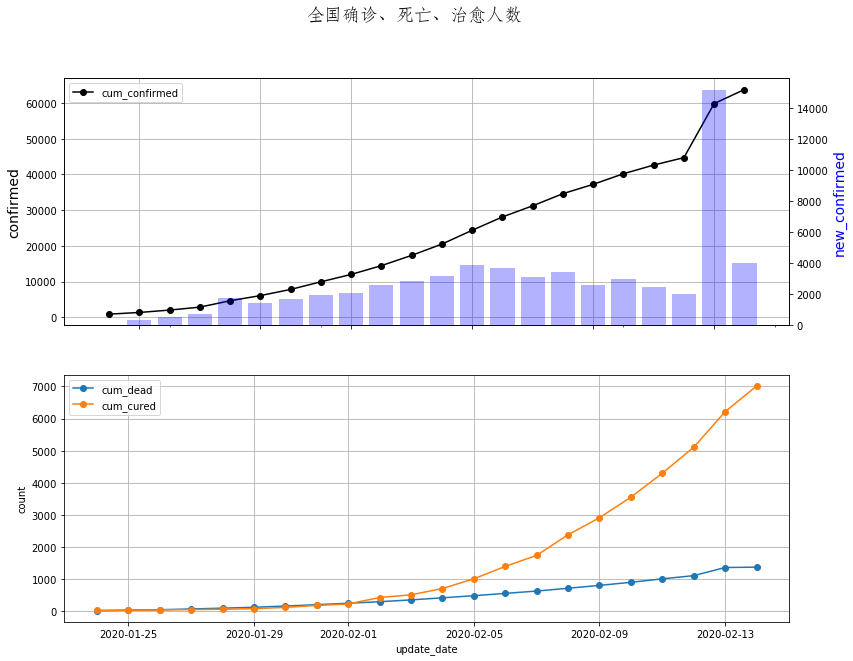

In [12]:
fig = utils.tsplot_conf_dead_cured(daily_frm, title='全国确诊、死亡、治愈人数')
plt.show()

#### 单个省份的时间序列也很容易，只要把想要的省份数据检索出来作为输入就可以了

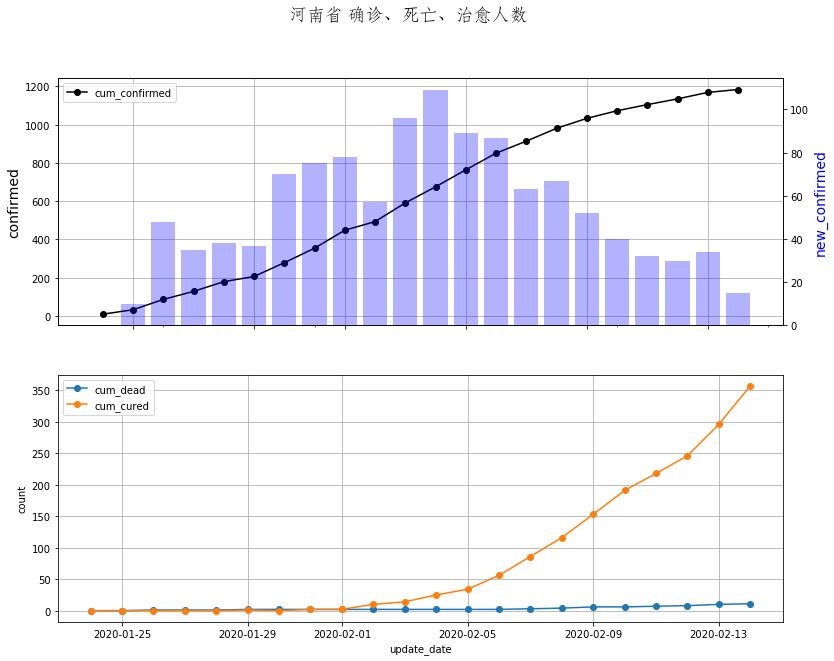

In [13]:
province = '河南省'   # 输入你所要的省份
fig = utils.tsplot_conf_dead_cured(daily_frm[daily_frm['province_name'] == province], title=province + ' 确诊、死亡、治愈人数')
plt.show()                                  

#### 单个城市用法也是一样的, 还可以使用 logy=True 画指数图，看人数是否指数增长

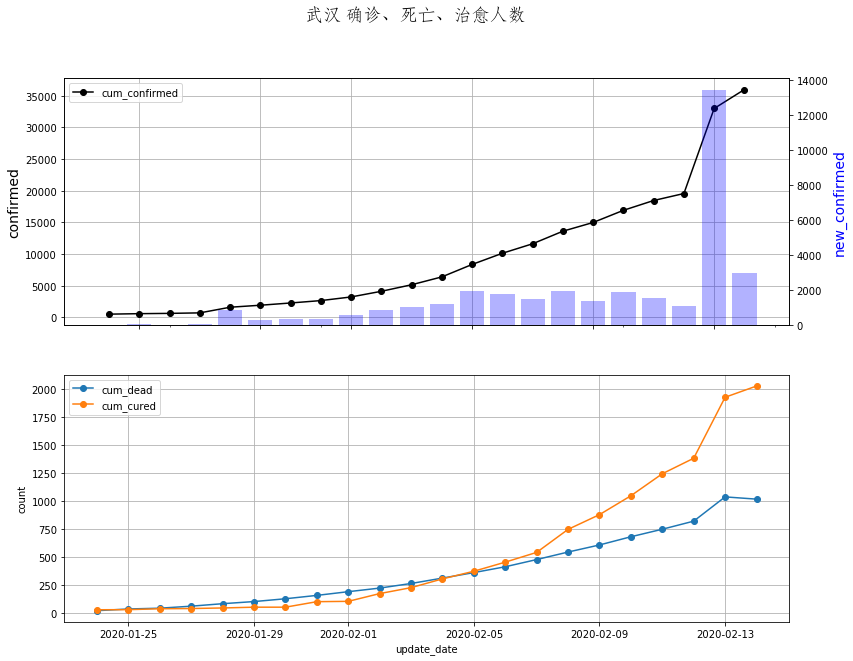

In [14]:
city = '武汉'
fig = utils.tsplot_conf_dead_cured(daily_frm[daily_frm['city_name'] == city], logy=False, 
                                  title=city + ' 确诊、死亡、治愈人数')
plt.show()  

### 3.3 横向比较图 utils.cross_sectional_bar()

#### 各省份在2月三号确诊数比较

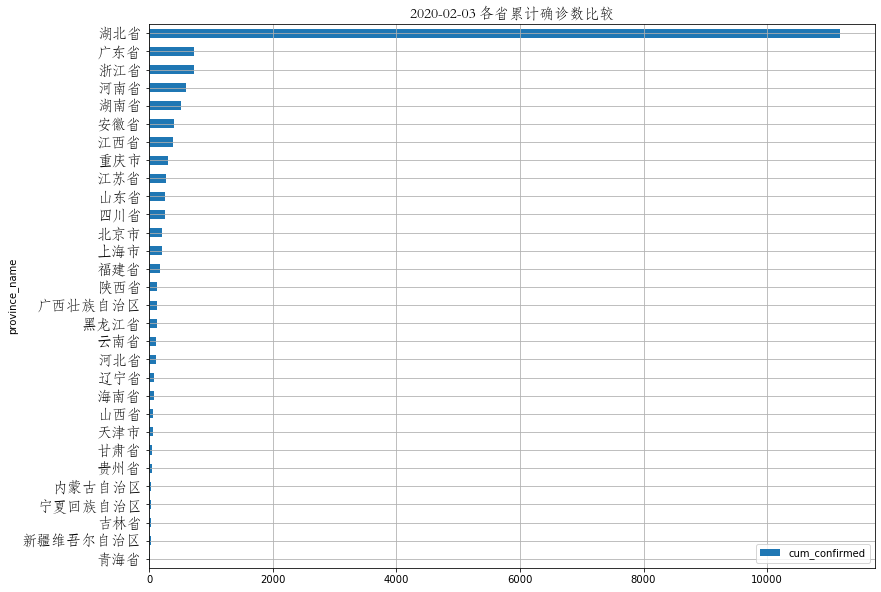

In [16]:
fig = utils.cross_sectional_bar(daily_frm, '2020-02-03', col='cum_confirmed', groupby='province_name',
                              title='2020-02-03 各省累计确诊数比较')
plt.show()

#### 湖北省各地2月1号死亡数比较

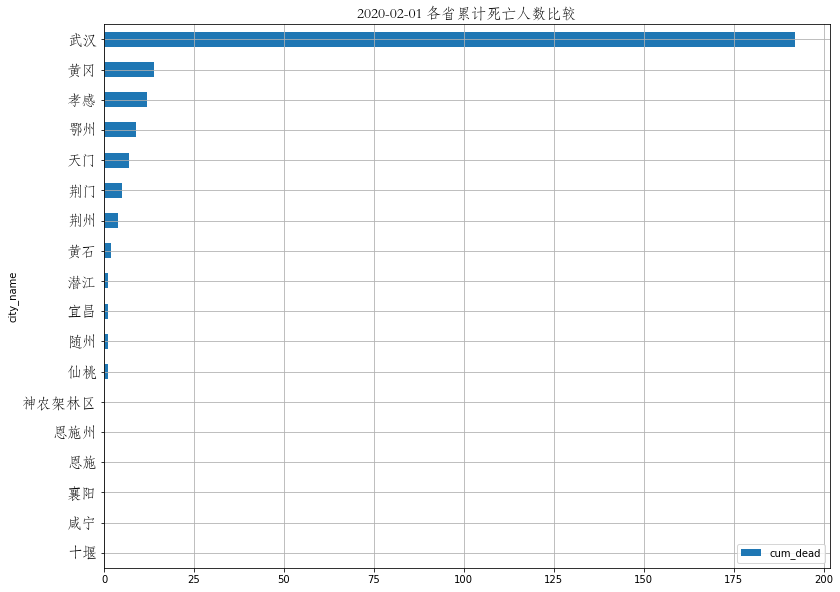

In [17]:
fig = utils.cross_sectional_bar(daily_frm[daily_frm['province_name'] == '湖北省'], '2020-02-01', col='cum_dead', groupby='city_name',
                              title='2020-02-01 各省累计死亡人数比较')
plt.show()

#### 全国2月5日新增确诊最多的十个城市 （用 largestN 参数限制横条数目）

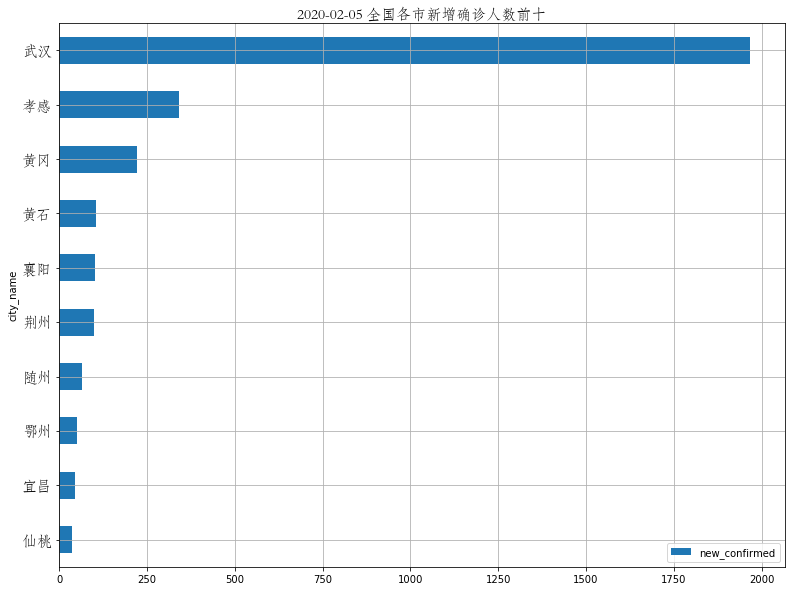

In [18]:
fig = utils.cross_sectional_bar(daily_frm, '2020-02-05', col='new_confirmed', groupby='city_name', largestN=10,
                              title='2020-02-05 全国各市新增确诊人数前十')
plt.show()